---
title: TEM Diffraction
authors: [Stephanie Ribet, Georgios Varnavides]
date: 2024/07/26
---

In [1]:
# %matplotlib ipympl
import ase
import abtem

import matplotlib.pyplot as plt
import numpy as np

In [2]:
STO_unit_cell   = ase.io.read('data/SrTiO3.cif')
# STO_atoms       = ase.build.surface(STO_unit_cell, (1,1,0), 4, periodic=True)*(8,12,40)
STO_atoms       = STO_unit_cell*(8,12,41)

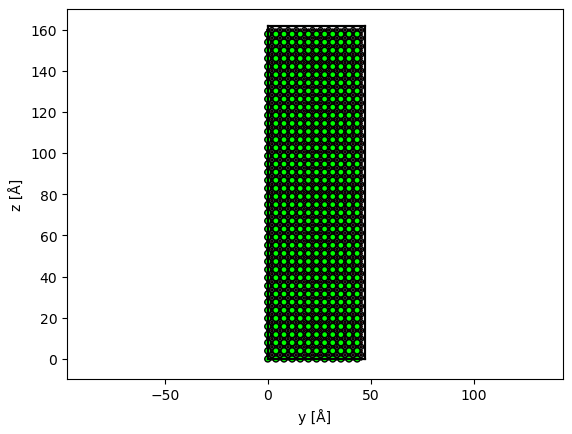

In [3]:
abtem.show_atoms(STO_atoms, "yz");

In [4]:
potential = abtem.Potential(
    STO_atoms,
    gpts=(512,512),
    device='cpu',
    projection='infinite',
    parametrization='kirkland',
    exit_planes=40,
    # exit_planes = ((-1, 40, 80, 120))
).build()

wave = abtem.PlaneWave(energy=300e3)

In [5]:
exit_waves = wave.multislice(potential)

In [6]:
measurement_ensemble = exit_waves.diffraction_patterns(max_angle=20)

[########################################] | 100% Completed | 3.65 ss


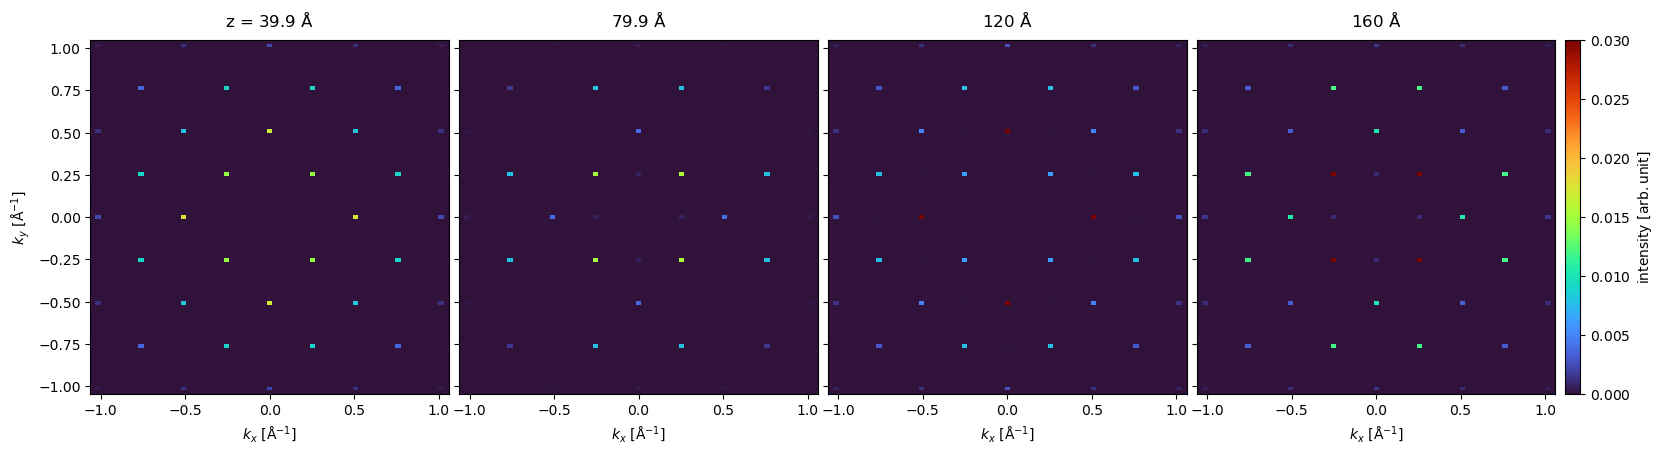

In [9]:
#| label: app:tem_diffraction

measurement_ensemble[1:-1].block_direct().show(
    explode=True,
    # interact = True,
    # ax = ax,
    figsize=(18, 5),
    cbar=True,
    common_color_scale=True,
    vmax = 0.03,
    cmap = "turbo",
)